# Additional Information

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region. 

The period from June 2012 to September 2012. 
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classifiinto˜fireâ€™ (138 class and â€e fireâ€™ (106 classes) classes.

# Attributes INFO:
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to nts  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Inde
12. Classes : (fire,not fire)
13. Region : (1 for seidi bel , 0 for bejaia): two classes

## Importing Necessery Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',skiprows=1)

## EDA & Data Cleaning

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
df[df['Classes  '].isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


the dataset is converted into two sets based on region from 122th index, we can make a new column based on the Region.
- 1:"bejaia Region dataset"
- 2:"sidi-bel abbes region dataset"

In [10]:
df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1

In [11]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [12]:
df.iloc[[167],-2] = 'fire'

In [13]:
df.dropna(inplace=True)

In [14]:
df.reset_index(drop=True,inplace=True)

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [17]:
df.drop(122,inplace=True)

In [18]:
df.reset_index(drop=True,inplace=True)

In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [20]:
# fix spcaes in cloumns names
for col in df.columns:
    df.rename(columns={col : str.strip(col)},
                  inplace=True)

In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [22]:
df[df['FWI'].str.contains('fire')]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,fire,1.0


In [23]:
df.loc[165,'FWI'] = 0

In [24]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 28.7+ KB


In [26]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               5
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [27]:
df['Classes'] = df['Classes'].str.strip()

In [28]:
df['Classes'].replace({'fire':1 , 'not fire':0},inplace=True)

In [29]:
df.iloc[165,-6]

'14.6 9'

In [30]:
df.iloc[165,-6] = '14.6'

In [31]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [32]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [33]:
df['Region'] = df['Region'].astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.7 KB


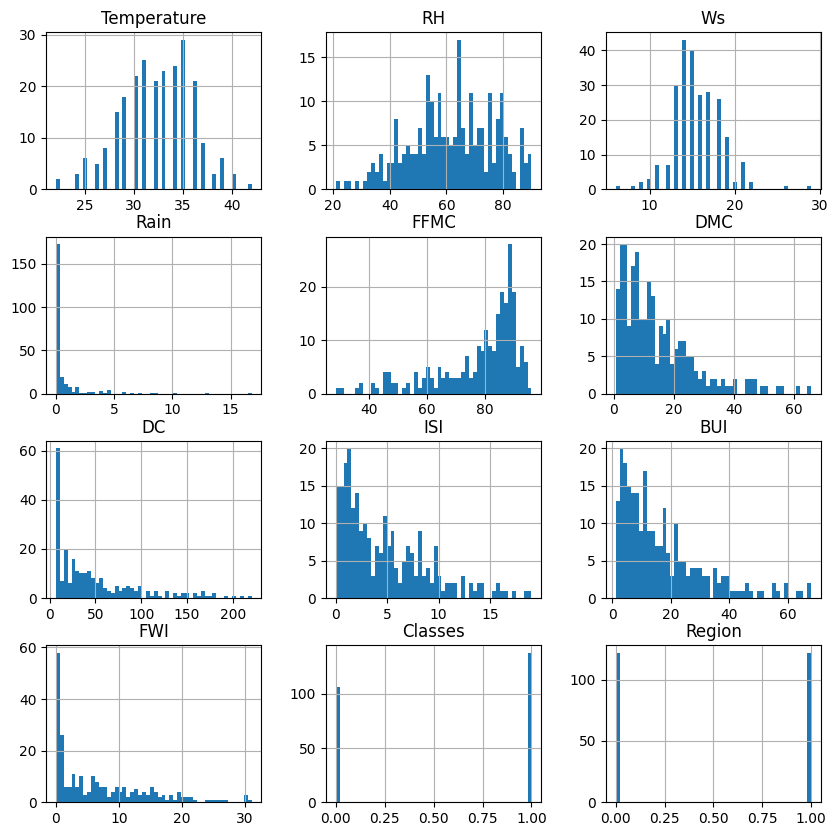

In [35]:
df.drop(columns=['day','month','year']).hist(bins=50,figsize=(10,10))
plt.show()

In [36]:
percentage =df['Classes'].value_counts(normalize=True)*100

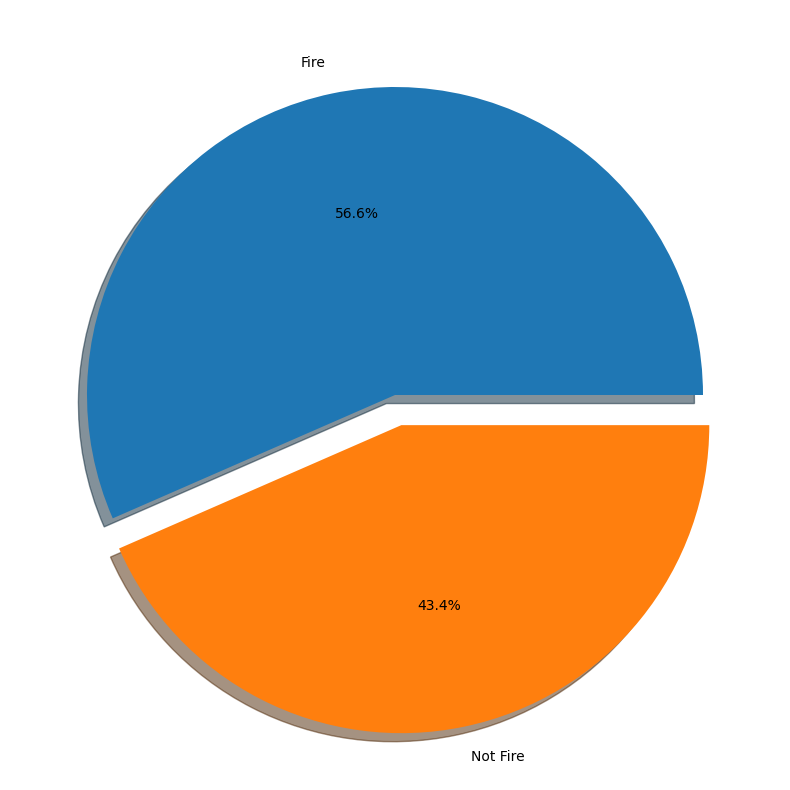

In [37]:
classlabels = ['Fire','Not Fire']
plt.figure(figsize=(10,10))
plt.pie(percentage,labels = classlabels , autopct='%1.1f%%',explode = [0,0.1],shadow=True)
plt.show()

## Checking correlations with our FWI feature (dependent)

<Axes: >

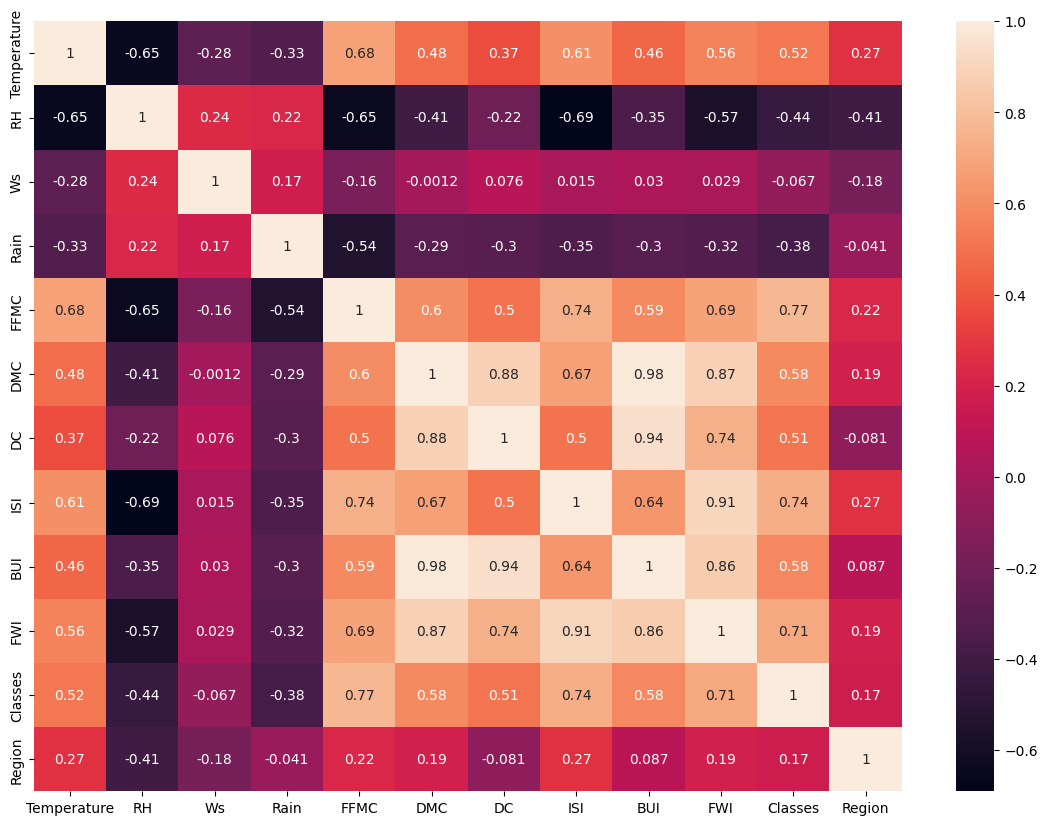

In [39]:
plt.figure(figsize=(14,10))
sns.heatmap(df.drop(columns=['day','month','year']).corr(),annot=True)

## We can see that most of the columns has high coorelation with our Dependent Feature (FWI) , wether it's positive or negative.

<Axes: ylabel='FWI'>

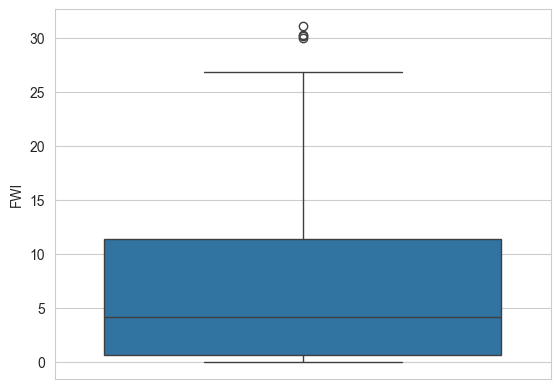

In [48]:
sns.boxplot(df['FWI'])

Text(0.5, 1.0, 'Fire Analysis Of bejaia Region.')

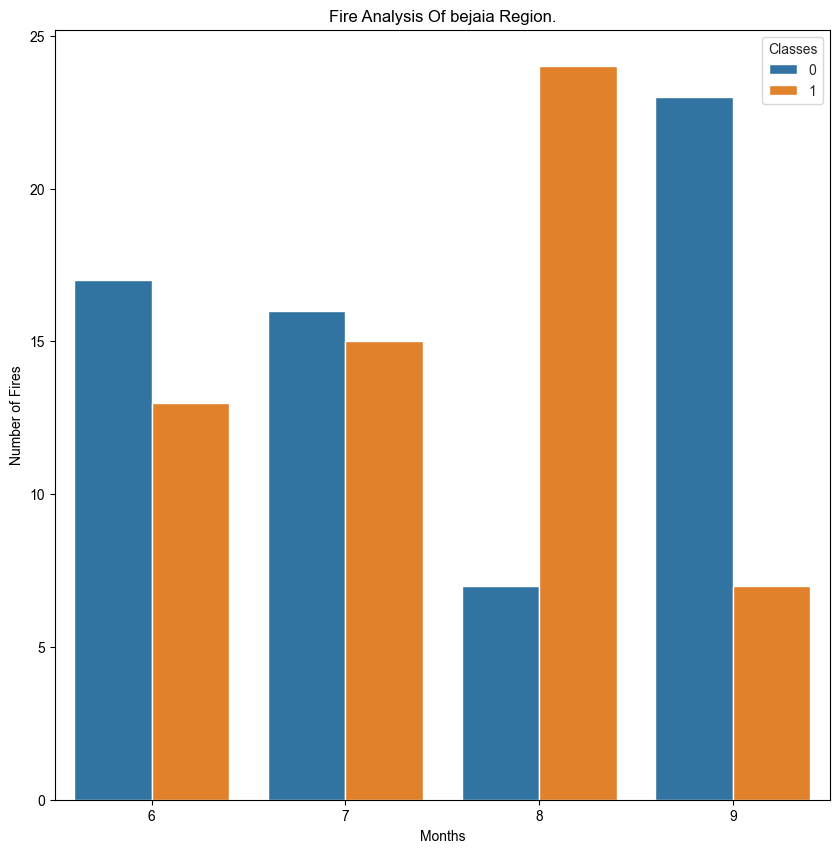

In [41]:
bejaia = df[df['Region'] == 0]
plt.subplots(figsize=(10,10))
sns.set_style('whitegrid')
sns.countplot(data=bejaia,x='month',hue='Classes')
plt.ylabel('Number of Fires')
plt.xlabel('Months')
plt.title('Fire Analysis Of bejaia Region.')

Text(0.5, 1.0, 'Fire Analysis Of seidi Region.')

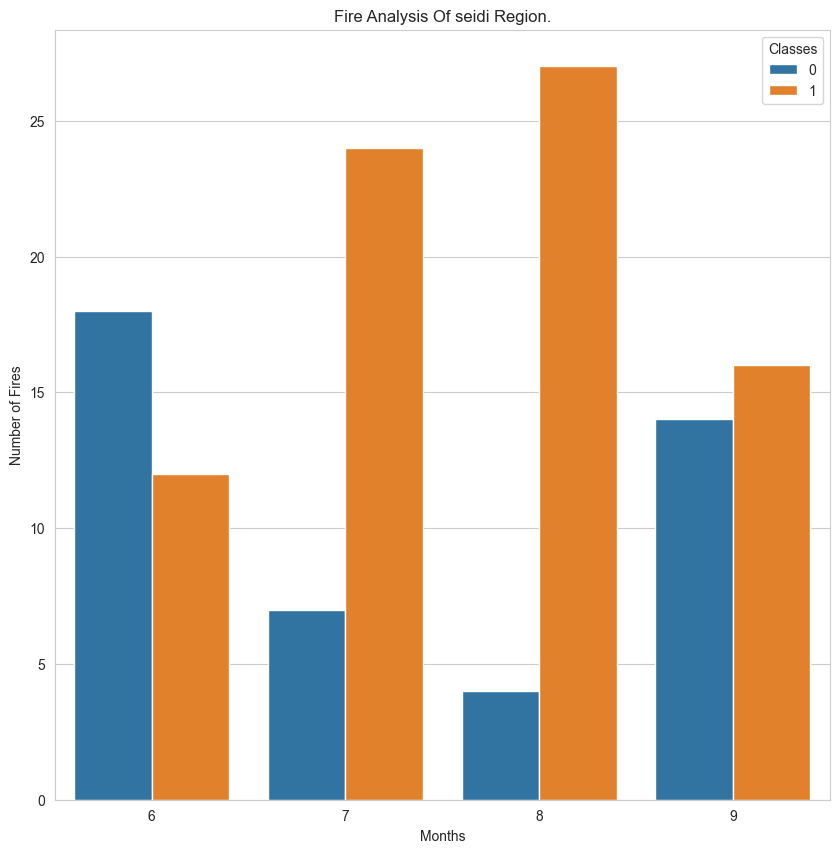

In [42]:
seidi = df[df['Region'] == 1]
plt.subplots(figsize=(10,10))
sns.set_style('whitegrid')
sns.countplot(data=seidi,x='month',hue='Classes')
plt.ylabel('Number of Fires')
plt.xlabel('Months')
plt.title('Fire Analysis Of seidi Region.')

# Insights:
- As we can see from these count plots that both regions suffer from severe fire incidents in july and september but less in june and september , except for seidi region september also has high fire incidents.